#### 1. Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

###### 2. Reading the csv file 

In [2]:
# Read the data as dataframe.  #'insurance_df' 
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###### 3. Perform basic ED

a) Shape of the data

In [3]:
insurance_df.shape
#1338 rows and 7 columns

(1338, 7)

b) Data Type of each attribute

In [4]:
print(insurance_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


c) Checking the pressence of any missing values

In [5]:
insurance_df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
# No missing values found in the dataframe

d) Five Point summary of numerical attributes

In [7]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


e) Distribution of 'bmi', 'age' and 'charges' columns

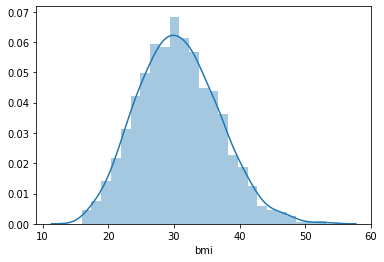

In [8]:
# distribution of 'bmi' column
sns.distplot(insurance_df.bmi)

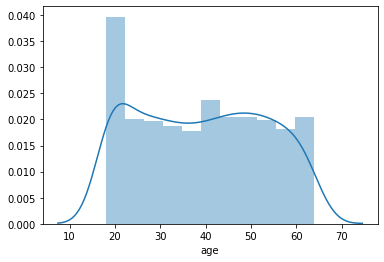

In [9]:
# distribution of 'age' columns
sns.distplot(insurance_df.age)

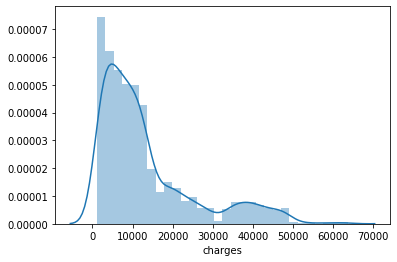

In [10]:
# distribution of 'charge' column
sns.distplot(insurance_df.charges)

f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 

In [11]:
# 'skew_df' - dataframe containing only bmi, age and charges columns
skew_df = insurance_df[['bmi','age','charges']]

In [12]:
skewvalue = skew_df.skew(axis=0)
print(skewvalue)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64


g) Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges' column

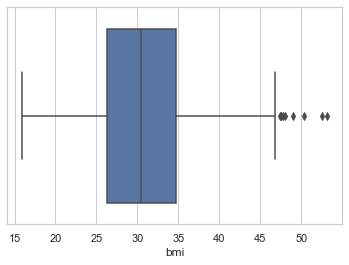

In [13]:
#finding outliers in bmi column through box plot
sns.set(style="whitegrid")
# checking for outliers in bmi columns through boxplot
sns.boxplot(x=insurance_df.bmi)

In [14]:
# There are outliers found in bmi columns as seen in boxplot.
# Lets find out which of these observations are outliers.

In [222]:
#finding IQR
from numpy import percentile
q25, q75 = np.percentile(insurance_df.bmi,25), percentile(insurance_df.bmi,75)
IQR = q75 - q25
#calculate the outlier cutoff
cut_off = IQR * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identifying outliers
outliers = [x for x in insurance_df.bmi if x < lower or x > upper]
print('total outliers in bmi are ',len(outliers))
outliers

total outliers in bmi are  9


[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

In [16]:
# 'outliers' - a list that contains outliers in bmi column.
# Lets find out which of these records in dataframe are outliers found in bmi column

In [17]:
for i in outliers:
    print(insurance_df[insurance_df.bmi == i])

     age   sex    bmi  children smoker     region     charges
116   58  male  49.06         0     no  southeast  11381.3254
     age     sex    bmi  children smoker     region    charges
286   46  female  48.07         2     no  northeast  9432.9253
     age   sex    bmi  children smoker     region    charges
401   47  male  47.52         1     no  southeast  8083.9198
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801
     age   sex    bmi  children smoker     region    charges
847   23  male  50.38         1     no  southeast  2438.0552
     age     sex   bmi  children smoker     region    charges
860   37  female  47.6         2    yes  southwest  46113.511
      age   sex    bmi  children smoker     region     charges
1047   22  male  52.58         1    yes  southeast  44501.3982
      age   sex    bmi  children smoker     region    charges
1088   52  male  47.74         1     no  southeast  9748.9106
  

In [18]:
# The above records are outliers in bmi

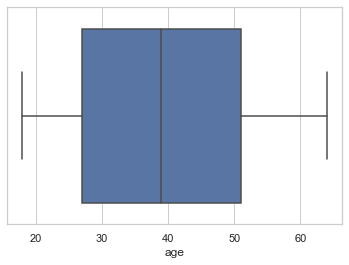

In [19]:
# Finding outliers in age column through boxplot
sns.boxplot(x=insurance_df.age)

In [20]:
# No outliers are found in age column

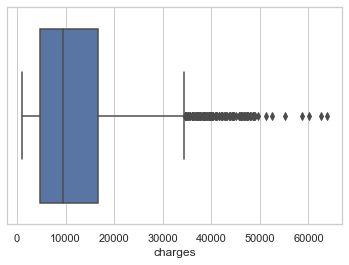

In [21]:
# finding outliers in charges column through boxplot
sns.boxplot(insurance_df.charges)

In [22]:
# As seen in boxplot, there are outliers found in the charges column
# Lets find out which are these outliers in the dataframe in charges column

In [23]:
#finding IQR
q25, q75 = np.percentile(insurance_df.charges,25), percentile(insurance_df.charges,75)
IQR = q75 - q25
#calculate the outlier cutoff
cut_off = IQR * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identifying outliers
outliers = [x for x in insurance_df.charges if x < lower or x > upper]
print('total outliers in bmi are ',len(outliers))

total outliers in bmi are  139


In [24]:
# 'outliers' - a list that contains outliers in charges column.
# Lets find out which of these records in dataframe are outliers found in charges column

In [25]:
for i in outliers:
    print(insurance_df[insurance_df.bmi == i])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smo

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smo

In [26]:
# The above records are outliers in charges column

h) Distribution of categorical columns (include children)

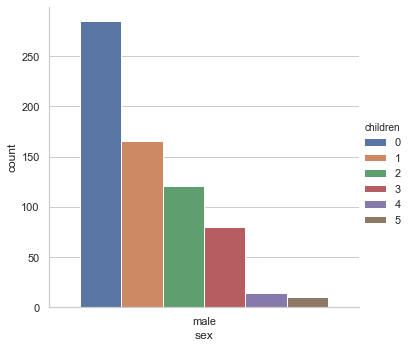

In [27]:
# No. of males with x number of children in data
sns.catplot('sex',hue='children', kind='count',data=insurance_df[insurance_df['sex']=='male'])

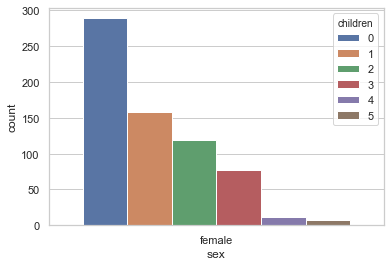

In [28]:
# Number of female with x number of children in data
sns.countplot(x='sex',hue='children',data=insurance_df[insurance_df['sex']=='female'])

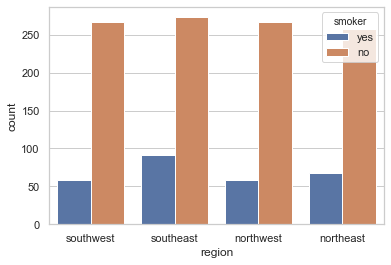

In [29]:
# number of smokers and non smokers areawise
sns.countplot(x='region',hue='smoker',data=insurance_df)

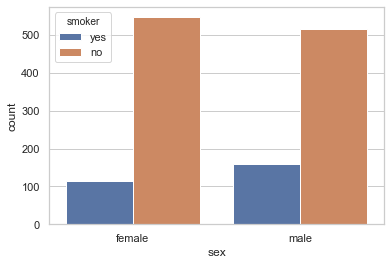

In [30]:
# number of smokers gender wise
sns.countplot('sex',hue='smoker',data=insurance_df)

i) Pair plot that includes all the columns of the data frame

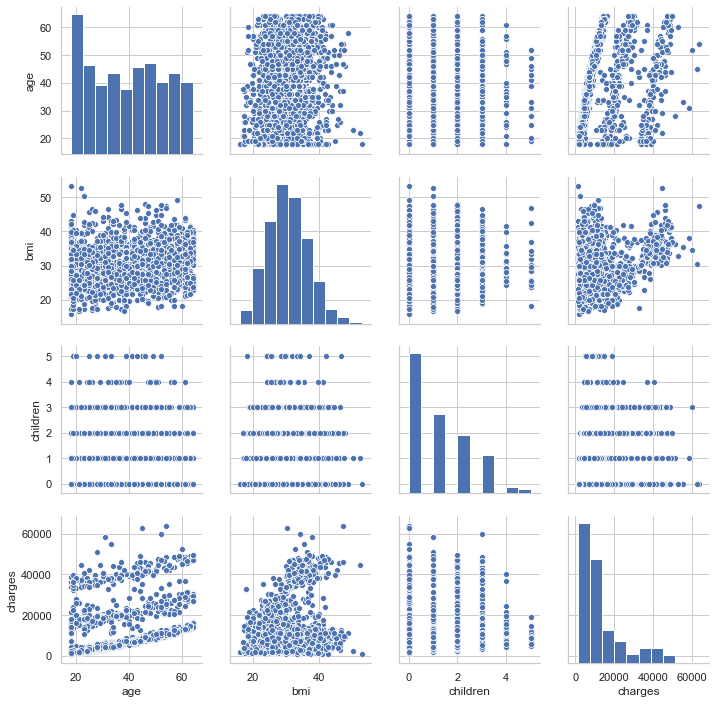

In [32]:
sns.pairplot(insurance_df)

###### 4. Answer the following question with statistical evidences

a) Do charges of people who smoke differ significantly from the people who don't?

b) Does bmi of males differ significantly from that of females?

c) Is the proportion of smokers significantly different in different genders?

d) Is the distibution of bmi across women with no children, one children and two children, the same?

### Do charges of people who smoke differ significantly from the people who don't?

In [148]:
#Ho : charges of people who smoke = charges of people who doesn't smoke
#Ha : charges of people who smoke != charges of people who doesn't smoke

In [202]:
# somkers - dataframe contains records only of smokers
smokers = insurance_df[insurance_df['smoker'] == 'yes']
# non_smokers - dataframe contains records only of non smokers
non_smokers = insurance_df[insurance_df['smoker'] == 'no']

In [203]:
print(non_smokers.shape)
print(smokers.shape)

(1064, 7)
(274, 7)


In [205]:
z_stat, p_val = sm.stats.ztest(smokers.charges, non_smokers.charges, alternative='two-sided')

In [206]:
print(z_stat, " , ",p_val)

46.664921172723716  ,  0.0


In [207]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


In [208]:
#hence charges of smokers are significantly differnt from charges of non smokers

### Does bmi of males differ significantly from that of females?

In [41]:
# Ho : bmi mean of male = bmi mean of female
# ha : bmi mean of male != bmi mean of female

In [188]:
two_df = insurance_df.copy()

In [249]:
#we need to compare females and males bmi diffrenetly therefore we will make two dataframes, each for males and females

In [189]:
females = two_df[two_df.sex == 'female']
males = two_df[two_df.sex == 'male']

In [190]:
print(females.sex.value_counts())
print(males.sex.value_counts())

female    662
Name: sex, dtype: int64
male    676
Name: sex, dtype: int64


Because how chi squared is calculated it is very sensitive to sample size - when the sample size is too large ~500,
almost any small difference will appear statistically significant. Therefore we calculate only for age specific age group.

In [191]:
# evaluating for people of age 19
nineteen = two_df[two_df['age'] == 19]
nineteen.sex.value_counts()

male      35
female    33
Name: sex, dtype: int64

In [192]:
sample_male = nineteen[nineteen['sex'] == 'male'].bmi.iloc[:-2]   #excluding the last two elements to match the size 2 samples
sample_female = nineteen[nineteen['sex'] == 'female'].bmi


In [193]:
v1, v2 = np.var(sample_female) , np.var(sample_male)
print(v1,v2)

30.765708585858583 35.05058650137741


In [100]:
# variance of males and females is different but is it significantly correct???

In [194]:
n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level

In [195]:
# finding chi-squared critical for 95% confidence level.
from scipy.stats import chi2
# define probability
p = 0.95
df = 33
# retrieve value <= probability
value = chi2.ppf(p, df)
print(value)
# confirm with cdf
chi_critical = chi2.cdf(value, df)
print(value,p)

47.39988391908093
47.39988391908093 0.95


In [196]:
chi = (dof*v1)/v2

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is more than the critical value, we reject the null


In [197]:
#hence we can say that bmi of males is significantly different than bmi of females.

### Alternate Way
If we consider all age groups, no of observations are very large. Therefore, we use z-test here.

In [209]:
z_stat, p_val = sm.stats.ztest(females.bmi,males.bmi,alternative='two-sided')

In [210]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


In [109]:
#hence we can say that bmi of males is significantly different than bmi of females.

### Is the proportion of smokers significantly different in different genders?

In [65]:
# H0: Proportion of smokers in femals is significantly different than in males
# Ha: Proportion of smokers in femals is not significantly different than in males

In [211]:
smokers = insurance_df[insurance_df.smoker == 'yes']
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [212]:
# finding count of male and female smokers
male_smoker = smokers[smokers.sex == 'male']
female_smoker = smokers[smokers.sex == 'female']
m_smoker_count = male_smoker.sex.value_counts()[0]
f_smoker_count = female_smoker.sex.value_counts()[0]

In [213]:
# finding total # of females in data  
n_females = insurance_df.sex.value_counts()[1]
n_females

662

In [214]:
# finding total # of males in data 
n_males = insurance_df.sex.value_counts()[0]
n_males

676

In [215]:
# [f_somker_count , f_count_in_data] , [m_somker_count , m_count_in_data]
print([f_smoker_count, m_smoker_count],[n_females,n_males])

[115, 159] [662, 676]


In [216]:
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [217]:
#the proportions are different but are they statistically different?

In [218]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([f_smoker_count, m_smoker_count] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


### Is the distibution of bmi across women with no children, one children and two children, the same?

In [219]:
# Ho : mean of bmi of women with no child = mean of bmi of women with one child = mean of bmi of women with two children
# Ho : mean of bmi of women with no child != mean of bmi of women with one child != mean of bmi of women with two children

In [232]:
four_df = insurance_df.copy()

In [233]:
# earlier we noticed we had outliers in bmi

In [234]:
women_temp = four_df[four_df['sex'] == 'female']
women_temp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [235]:
# women - dataframe that contain records of females having, EITHER no children and OR one child OR two children
# women_nochild - dataframe contain records of females who doesn't have any children
# women_onechild - dataframe contain records of  females who have only one child
# women_twochild - dataframe contain records of females who have two children
women = women_temp[women_temp['children'].isin([0,1,2])]
women_nochild = women_temp[women_temp['children'] == 0]
women_onechild = women_temp[women_temp['children'] == 1]
women_twochild = women_temp[women_temp['children'] == 2]

In [236]:
print(women_nochild.bmi.mean())
print(women_onechild.bmi.mean())
print(women_twochild.bmi.mean())

30.361522491349486
30.05265822784811
30.64978991596637


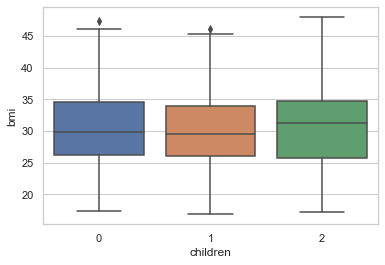

In [237]:
sns.boxplot(y=women.bmi,x=women.children)

In [238]:
# the box plots overlaps with one another which indicates that there is not much diffrenece between three groups 
# the mean also shows that there is no considerable difference between the three groups.
# however, difference in means is not sufficient that there would be a difference in population mean.

In [239]:
# Doing Analysis Of Variance

In [240]:
# Sum of squares (total) : denoted as SST
# Sum of squares (between) : denoted as SSB
# Sum of squares (within) : denoted as SSW

In [241]:
#SST
mean_overall = np.mean(women.bmi)
SST = np.sum((women.bmi - mean_overall)**2)
print(SST)

20720.251706404593


In [242]:
#SSW
#we have three group (no_child, one_child, two_child)
SSW0 = np.sum((women_nochild.bmi - np.mean(women_nochild.bmi))**2)
SSW1 = np.sum((women_onechild.bmi - np.mean(women_onechild.bmi))**2)
SSW2 = np.sum((women_twochild.bmi - np.mean(women_twochild.bmi))**2)
print(SSW0,'------',SSW1,'------',SSW2)
SSW = SSW0 + SSW1 + SSW2
print(SSW)

10254.039580103807 ------ 5257.523933544303 ------ 5184.098069747899
20695.66158339601


In [243]:
#SSB sum of square between is the variablility between samples.
SSB0 = len(women_nochild.bmi) * (((np.mean(women_nochild.bmi)) - mean_overall)**2)
SSB1 = len(women_onechild.bmi) * (((np.mean(women_onechild.bmi)) - mean_overall)**2)
SSB2 = len(women_twochild.bmi) * (((np.mean(women_twochild.bmi)) - mean_overall)**2)
SSB = SSB0 + SSB1 + SSB2
print(SSB)

24.590123008582545


In [244]:
# SST = SSB + SSW
print(SST)
print(SSB + SSW)

20720.251706404593
20720.251706404593


In [245]:
# no of observation in women = 566 (N)
# no of observation in women_nochild = 289 (n1)
# no of observation in women_onechild = 158 (n2)
# no of observation in women_twochild = 119 (n3)
# Degree of freedom for SST = (N-1) i.e 566-1 = 564
# Degree of freedom for SSB = [total # of groups/sample -1] => (k-1) i.e 3-1 = 2
# Degree of freedom for SSW = (No. of groups) * (member in each group -1 ) => [k(n-1)]
# however, n1 != n2 !=n3 therefore, degree of freedom for SSW = N-k i.e 566-3 = 563

In [246]:
k=3 # Number of groups are three, [women_with_no_child, women_with_one_child, women_with_two_child]
# MSSB - Mean sum of squares (between)
MSSB = SSB/(k-1)
MSSB

12.295061504291272

In [247]:
N = women.bmi.count()  # N - total number of observation in women
# MSSW - Mean sum of square (witin)
MSSW = SSW/(N-k)
MSSW

36.75961204866076

In [248]:
#calculating F-statistics
F_calculated = MSSB/MSSW
F_calculated 

0.334472014775771

In [254]:
#finding f critical
from scipy.stats import f
#f.ppf( significance_level,  degree of freedom for MSB,  degree of freedom for MSW )
F_critical = f.ppf(0.95,2,563)
F_critical

3.011729310965159

In [250]:
# F_calculated < F_critical 
# 0.0493  <  3.0118
# hence we fail to reject null hypothesis
#hence we can say that bmi of women with no children and one child and two children are the same 

### Alternative way of ANOVA (Question 4 d)

In [251]:
# little preprocessing

In [257]:
women = women_temp[women_temp.children.isin([0,1,2])][['children','bmi']]
women.children.value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [258]:
women.children.replace(0,'No child', inplace = True)
women.children.replace(1,'One child', inplace = True)
women.children.replace(2,'Two child', inplace = True)
women.children.value_counts()

No child     289
One child    158
Two child    119
Name: children, dtype: int64

In [259]:
# code 1 for ANOVA

In [260]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

results = ols('bmi ~ children', data=women).fit()
#results.summary() #change value of type = 1 or 2 or 3 for different views
aov_table = sm.stats.anova_lm(results,typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,266406.571870,1.0,7247.262880,9.881313e-324
children,24.590123,2.0,0.334472,7.158580e-01
Residual,20695.661583,563.0,NaN,NaN


In [261]:
# code 2 for ANOVA

In [264]:
import scipy.stats as stats
f_stat, p_val = stats.f_oneway(women.loc[women.children == 'No child', 'bmi'],
                             women.loc[women.children == 'One child', 'bmi'],
                             women.loc[women.children == 'Two child', 'bmi'])
print(f_stat, p_val)

0.3344720147757968 0.7158579926754841


In [266]:
if p_val < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is not significant. aka |We fail to reject the null|


In [220]:
# for both, code1 and code2:
# p > 0.05 hence we fail to reject the null
#hence we can say that bmi of women with no children and one child and two children are the same